In [1]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
import spacy
from ast import literal_eval
import folium


#need to run this line in terminal to install the Spanish lemmatization library - >> python -m spacy download es_core_news_sm

nlp = spacy.load('es_core_news_sm')


df1 = pd.read_csv('Airtables/CBP One 23/Cleaned Privilege Document CBP ONE 2023.csv')

df2 = pd.read_csv("Airtables/LAMX Front Desk Data/LAMX Front Desk (Combined) data.csv")

df3 = pd.read_csv('Airtables/T42_Exceptions Post Consortium/CleanedT42File.csv')

df4 = pd.read_csv('Airtables/T42_Screenings/T42 Screenings (Combined) data.csv')

df = pd.concat([df1, df2, df3, df4], axis=0)
df

,Date,Name,Country of Origin,Date of Birth,Notes,Total Family Members,Victim of Crime/Violence,LGBTQ+,Location,MPP,Health Problem,Explain Health Problem,Explain Crime/Violence,Birth Country
0,2023-01-24 00:00:00.000,Andrea Arias Guillen,Mexico,1994-12-16 00:00:00,Solo el proceso fue lento con la app del CBPone,1.0,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-01-24 00:00:00.000,Winder Roberto Pernia Jimenez,Colombia,1991-10-15 00:00:00,NaN,4.0,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-01-24 00:00:00.000,Maria de la Luz Gonzalez Olvera,Mexico,1966-12-05 00:00:00,NaN,3.0,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-01-24 00:00:00.000,Pedro Rios,Mexico,1972-06-11 00:00:00,NaN,1.0,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-01-24 00:00:00.000,Lesly Martinez,Honduras,1972-04-13 00:00:00,No puede enviar su informacion ha batallado mu...,1.0,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,06/11/2021,Grettel Anahi Santos zepeda,Honduras,10/8/2018,NaN,2.0,Si,No,NaN,NaN,No,NaN,Nos da miedo salir ala calle,NaN
1560,06/11/2021,Brenda Yamileth Lara barahona,Honduras,16/5/1989,Verified no status in a third country/no US de...,3.0,Si,No,NaN,NaN,Si,Estoy padesiendoede trauma insomnio nervios,Yo Brenda Yamileth Lara barahona fui secuestra...,NaN
1561,06/11/2021,Gabriel No tengo López Delcid,Honduras,25/8/1998,Verified no status in a third country/no US de...,3.0,Si,No,NaN,NaN,Si,Tengo un golpe interno el la columna vertebral...,Tengo un golpe interno el la columna vertebral...,NaN
1562,06/11/2021,Sahily Yamileth López lara,Honduras,10/7/2019,Verified no status in a third country/no US de...,3.0,Si,No,NaN,NaN,Si,Fue detectada con bronquitis pulmonar se le c...,Yo madre de sahily Yamileth López Lara mi hija...,NaN


In [2]:
df['Total Family Members'].value_counts()

Total Family Members
1.0     3127
3.0     2220
2.0     2123
4.0     1553
5.0      904
6.0      541
7.0      247
10.0      52
8.0       44
9.0       18
11.0       8
0.0        4
13.0       3
12.0       3
15.0       1
Name: count, dtype: int64

In [3]:
df['Total Family Members'] = df['Total Family Members'].fillna(1)
df['Total Family Members'] = df['Total Family Members'].replace(0,1)

In [4]:
nan_count = df['Total Family Members'].isna().sum()
print(nan_count)

0


In [5]:
df['Total Family Members'].sum()
#prior to turning every row that didnt have the total family members into a 

30957.0

In [22]:
df['LGBTQ+'] = df['LGBTQ+'].replace(False, "No")
df['LGBTQ+'] = df['LGBTQ+'].replace(True, "Si")
df['LGBTQ+'] = df['LGBTQ+'].replace("Prefiero no decir", "Unknown")

df['LGBTQ+'].value_counts()


LGBTQ+
No                                                                                                          7534
Unknown                                                                                                     1171
Si                                                                                                          1107
Mi niño es ciudadano estadounidense nacio el 14 de abril de 2017 en el hospital Mission  en Alton texas.       1
Name: count, dtype: int64

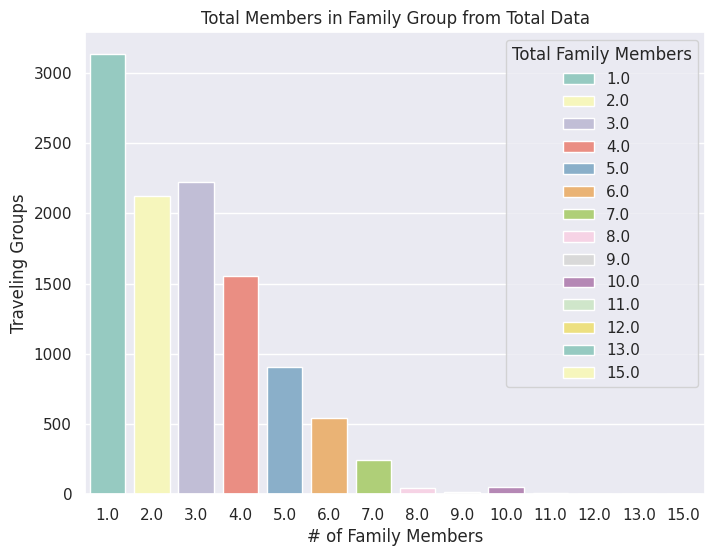

In [7]:
# Create a count plot using Seaborn
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='Total Family Members', data=df, palette="Set3", hue="Total Family Members")

# Customize the plot (optional)
plt.title('Total Members in Family Group from Total Data')
plt.xlabel('# of Family Members')
plt.ylabel('Traveling Groups')

# Show the plot
plt.show()

Country of Origin
Haiti                   3472
Mexico                  2177
Honduras                2029
Guatemala               1007
Venezuela                853
El Salvador              488
Cuba                     141
Other                    130
Nicaragua                100
Colombia                  73
Ecuador                   58
Hombre                     4
Brazil                     2
Republica Dominicana       1
Cameroon                   1
Mujer                      1
Name: count, dtype: int64


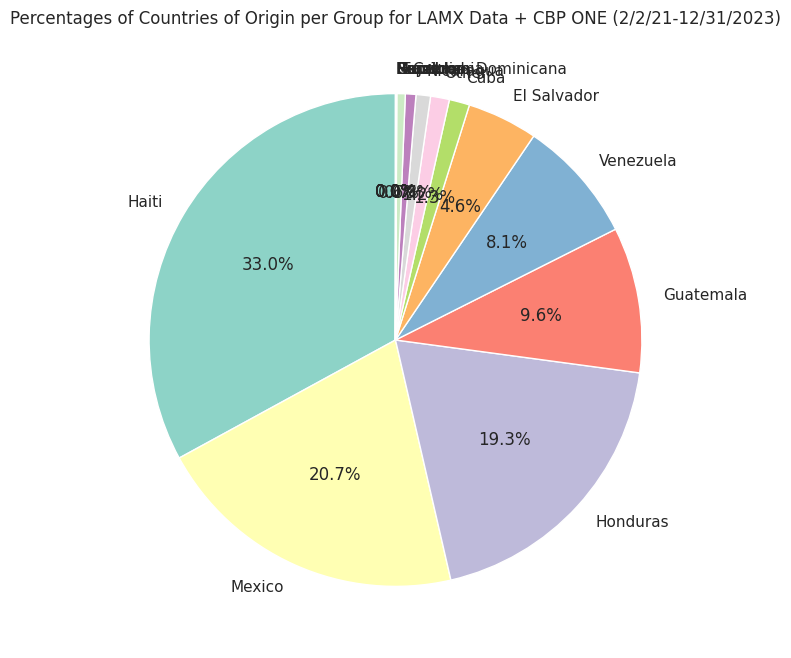

In [8]:
country_mapping = {
    'México': 'Mexico',
    'Venezula': 'Venezuela',
    'Nicaragua': 'Nicaragua',
    'venezuela' : 'Venezuela',
    'Otro': 'Other',
    "mexico": "Mexico"
}



df["Country of Origin"] = df["Country of Origin"].replace(country_mapping).str.strip()

category_counts = df['Country of Origin'].value_counts()
print(category_counts)

# Create a pie chart using matplotlib.pyplot
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)

# Customize the plot using Seaborn style
sns.set(style="whitegrid")
plt.title('Percentages of Countries of Origin per Group for LAMX Data + CBP ONE (2/2/21-12/31/2023)')

# Show the plot
plt.show()


In [9]:
#Setting up the world countries data URL
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'

value_counts = df['Country of Origin'].value_counts()

value_counts_df = pd.DataFrame(value_counts).reset_index()

# Rename columns
value_counts_df.columns = ['Country', 'Count']

central_america_coords = [14.69, -90.53]

# Create a map centered around Central America
m = folium.Map(location=central_america_coords, zoom_start=4)

folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=country_shapes,
    name='Immigration Country',
    data=value_counts_df,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['Country', 'Count'],
    key_on='feature.properties.name',
    fill_color='RdYlGn_r',
    nan_fill_color='white',
    legend_name="Person per Country",

).add_to(m)

m


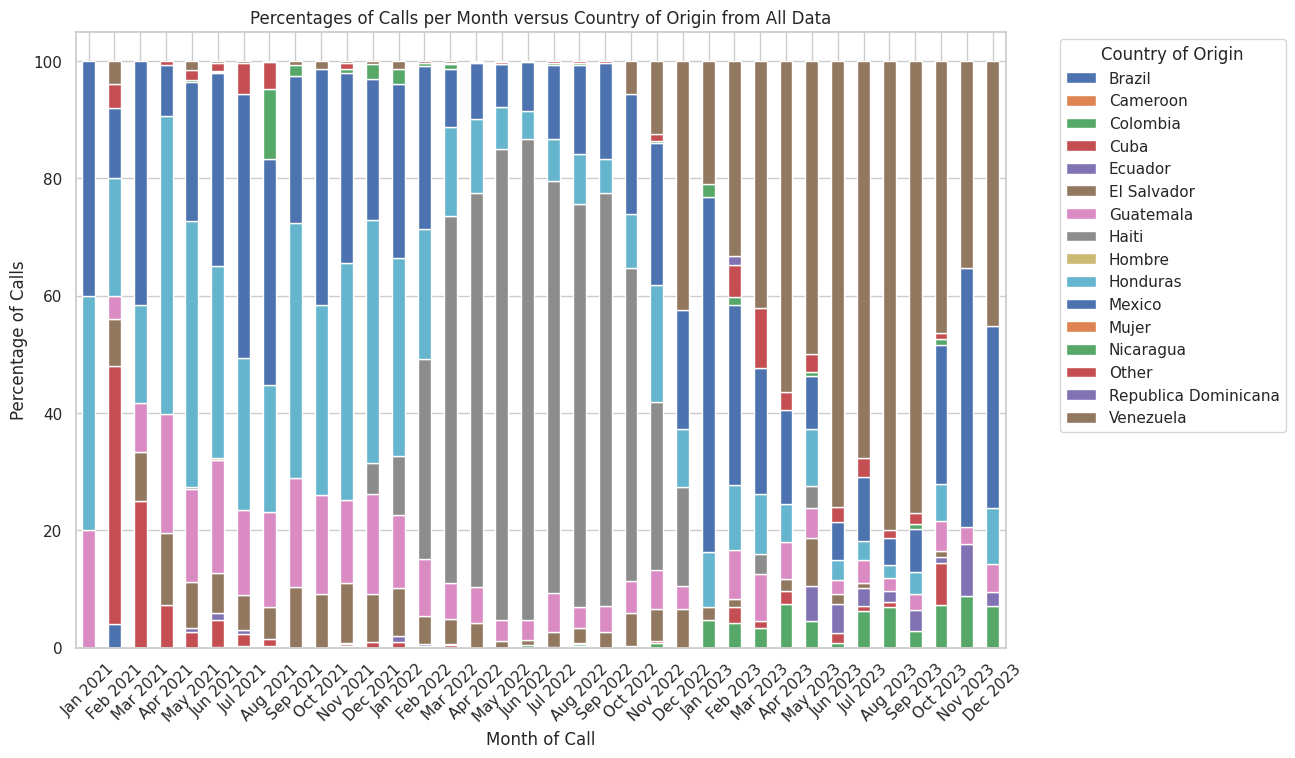

In [26]:
import calendar
import matplotlib as mpl
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'], format="mixed")
def replace_dates_before(date):
    start_date = datetime.strptime("2021-1-01", '%Y-%m-%d')
    if date < start_date:
        return start_date
    else:
        return date


df['Date'] = df['Date'].apply(replace_dates_before)
# Step 3: Extract month from 'Date of Appt' column
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year



# Step 4: Group data by month and country of origin
grouped = df.groupby(['Year', 'Month', 'Country of Origin']).size().unstack(fill_value=0)
# Step 5: Calculate percentage of each country of origin within each month group
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100
'''cmap = plt.cm.gist_rainbow
norm = mpl.colors.Normalize(vmin=0, vmax=len(percentages) - 1)
colors = [cmap(norm(i)) for i in range(len(percentages))]
'''

# Step 6: Plot the bar graph
ax = percentages.plot(kind='bar', stacked=True,figsize=(12, 8))
plt.xlabel('Month of Call')
plt.ylabel('Percentage of Calls')
plt.title('Percentages of Calls per Month versus Country of Origin from All Data')
plt.legend(title='Country of Origin', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(len(percentages)), [f"{calendar.month_abbr[int(month)]} {int(year)}" for year, month in percentages.index], rotation=45)
#plt.tight_layout()
plt.show()


9366
Country of Origin
Brazil            2
Cameroon          1
Colombia         15
Cuba            123
Ecuador          29
El Salvador     470
Guatemala       959
Haiti          3450
Hombre            4
Honduras       1962
Mexico         1997
Mujer             1
Nicaragua        95
Other            99
Venezuela       159
dtype: int64
Country of Origin
Brazil           0
Cameroon         0
Colombia         3
Cuba            12
Ecuador          6
El Salvador     68
Guatemala       92
Haiti          230
Hombre           0
Honduras       202
Mexico         372
Mujer            0
Nicaragua       28
Other           20
Venezuela       30
Name: LGBTQ+, dtype: int64


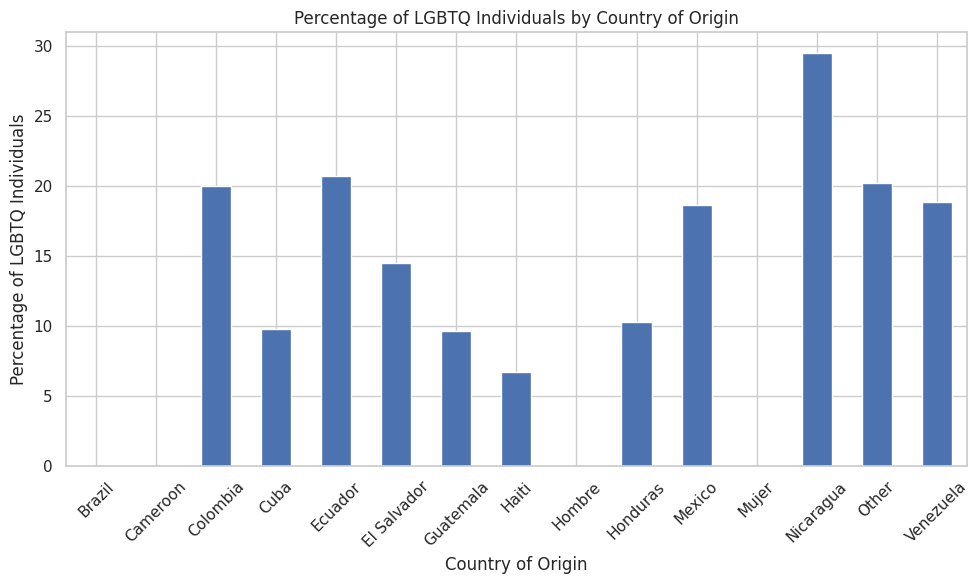

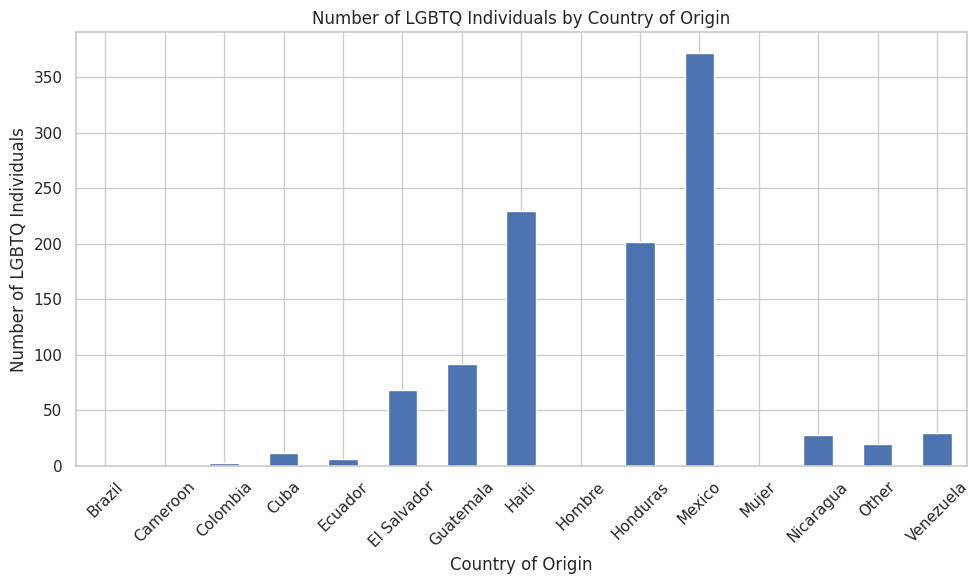

In [23]:
###LGBTQ by Country Graph###
unknowns_removed = df[df["LGBTQ+"] != "Unknown"]
grouped = unknowns_removed.groupby('Country of Origin')

# Step 2: Calculate the total number of individuals from each country
total_individuals = grouped.size()
print(total_individuals.sum())

# Step 3: Calculate the total number of LGBTQ individuals from each country 
lgbtq_individuals = grouped['LGBTQ+'].apply(lambda x: (x == 'Si').sum())
#lgbtq_individuals = grouped['¿Se identifica como miembro de la comunidad LGBTQ+?'].sum()
print(total_individuals)
print(lgbtq_individuals)

# Step 4: Calculate the percentage of LGBTQ individuals for each country
percentages = (lgbtq_individuals / total_individuals) * 100

# Step 5: Plot the percentages on a bar graph
plt.figure(figsize=(10, 6))  # Set the size of the plot
percentages.plot(kind='bar')
plt.xlabel('Country of Origin')
plt.ylabel('Percentage of LGBTQ Individuals')
plt.title('Percentage of LGBTQ Individuals by Country of Origin')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))  # Set the size of the plot
lgbtq_individuals.plot(kind='bar')
plt.xlabel('Country of Origin')
plt.ylabel('Number of LGBTQ Individuals')
plt.title('Number of LGBTQ Individuals by Country of Origin')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


9382
